In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [3]:
train_data = pd.read_csv('intent_train_data.csv')
test_data = pd.read_csv('intent_test_data.csv')

In [4]:
train_data.head()

,intent,label
0,add another song to the cita rom ntica playlist,AddToPlaylist
1,add clem burke in my playlist pre party r b jams,AddToPlaylist
2,add live from aragon ballroom to trapeo,AddToPlaylist
3,add unite and win to my night out,AddToPlaylist
4,add track to my digster future hits,AddToPlaylist


In [5]:
test_data.head()

,intent,label
0,i 'd like to have this track onto my classical...,AddToPlaylist
1,add the album to my flow espa ol playlist,AddToPlaylist
2,add digging now to my young at heart playlist,AddToPlaylist
3,add this song by too poetic to my piano ballad...,AddToPlaylist
4,add this album to old school death metal,AddToPlaylist


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11784 entries, 0 to 11783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   intent  11784 non-null  object
 1   label   11784 non-null  object
dtypes: object(2)
memory usage: 184.2+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   intent  600 non-null    object
 1   label   600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [10]:
intent_train = train_data['intent'].tolist()
label_train = train_data['label'].tolist()
intent_test = test_data['intent'].tolist()
label_test = test_data['label'].tolist()

In [11]:
print(len(intent_train), len(intent_test))
print(len(label_train), len(label_test))

11784 600
11784 600


In [12]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']


In [13]:
print(intent_train[2000:2005])
print(label_train[2000:2005])

['please book reservations for 3 people at a restaurant in alderwood manor', 'book a table in mt for 3 for now at a pub that serves south indian', 'book a table in belhaven for a party of seven at the great house at sonning', 'i want to book a restaurant near wyoming for 5 people', 'get me a table at eighth step coffee house in germania for 7']
['BookRestaurant', 'BookRestaurant', 'BookRestaurant', 'BookRestaurant', 'BookRestaurant']


In [14]:
print(intent_train[4000:4005])
print(label_train[4000:4005])

['what will the weather be like on feb 8 , 2034 in cedar mountain wilderness', "tell me the forecast in the same area here on robert e lee 's birthday", 'is there rain now in maine', 'will it get chillier in north creek forest \\?', "what 's the weather forecast for elida , rhode island \\?"]
['GetWeather', 'GetWeather', 'GetWeather', 'GetWeather', 'GetWeather']


In [15]:
print(intent_train[6000:6005])
print(label_train[6000:6005])

['rate the current album one points', 'i give a zero rating for this essay', 'rate this book a zero', 'rate the current album 3 of 6 stars', 'rate the secret of dr honigberger 2 points out of 6']
['RateBook', 'RateBook', 'RateBook', 'RateBook', 'RateBook']


In [16]:
print(intent_train[8000:8005])
print(label_train[8000:8005])

["i'm trying to find the show chant ii", 'find spirit of the bush', 'please look up the painting beyond iconic photographer dennis stock', 'play keep their heads ringin', 'find a tv show called directions home']
['SearchCreativeWork', 'SearchCreativeWork', 'SearchCreativeWork', 'SearchCreativeWork', 'SearchCreativeWork']


In [17]:
print(intent_train[10000:10005])
print(label_train[10000:10005])

['when is blood and ice cream trilogie playing at the nearest movie theatre \\?', 'show movie schedules', 'when is bless the child playing at the movie theatre', 'show movie schedule of films in the area', 'find the movie schedule']
['SearchScreeningEvent', 'SearchScreeningEvent', 'SearchScreeningEvent', 'SearchScreeningEvent', 'SearchScreeningEvent']


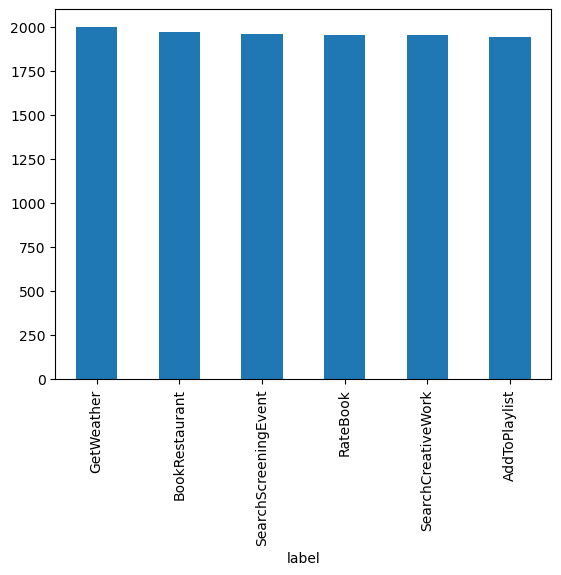

In [18]:
train_data['label'].value_counts().plot(kind='bar')
plt.show()

In [19]:
idx_encode = preprocessing.LabelEncoder() # 레이블에 고유한 정수를 부여
idx_encode.fit(label_train)

label_train = idx_encode.transform(label_train) # 변환
label_test = idx_encode.transform(label_test) # 변환

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
label_idx

{'AddToPlaylist': 0,
 'BookRestaurant': 1,
 'GetWeather': 2,
 'RateBook': 3,
 'SearchCreativeWork': 4,
 'SearchScreeningEvent': 5}

In [21]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
[0 0 0 0 0]


In [20]:
print(intent_test[:5])
print(label_train[:5])

["i 'd like to have this track onto my classical relaxations playlist", 'add the album to my flow espa ol playlist', 'add digging now to my young at heart playlist', 'add this song by too poetic to my piano ballads playlist', 'add this album to old school death metal']
[0 0 0 0 0]


In [25]:
# 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)
sequences[:5]

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27],
 [11, 92, 4, 14, 651, 520, 195]]

In [26]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
vocab_size

9870

In [31]:
print('최대 길이 : ', max(len(l) for l in sequences))
# map(len, sequnces) : 각 시퀸스별로 len 함수 적용 == [len(x) for x in X_train_encoded]
print('평균 길이 : ', sum(map(len, sequences))/len(sequences))

최대 길이 :  35
평균 길이 :  9.364392396469789


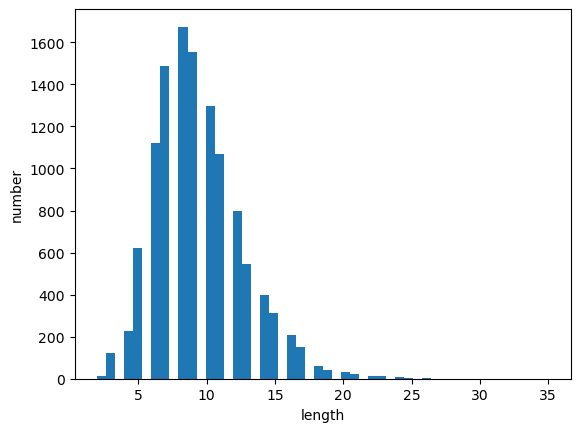

In [32]:
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length')
plt.ylabel('number')
plt.show()

In [33]:
max_len = 40
intent_train = pad_sequences(sequences, maxlen=max_len)
label_train = to_categorical(np.asarray(label_train))
print(intent_train.shape, label_train.shape)

(11784, 40) (11784, 6)


In [34]:
print(intent_train[0], label_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   11  191   61    4    1 4013 1141 1572   15] [1. 0. 0. 0. 0. 0.]


In [35]:
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
indices

array([   96,  5623,  6304, ...,  8722, 10921,  1882])

In [36]:
intent_train = intent_train[indices]
label_train = label_train[indices]

In [46]:
# 분류작업
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(6, activation='softmax')) # 다중 분류이기 때문

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          315840    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          5152      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                      

In [47]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [50]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/5
116/118 [============================>.] - ETA: 0s - loss: 0.4866 - acc: 0.2819
Epoch 1: val_acc improved from -inf to 0.68823, saving model to best_model.h5
118/118 [==============================] - 1s 6ms/step - loss: 0.4847 - acc: 0.2864 - val_loss: 0.3158 - val_acc: 0.6882
Epoch 2/5
 45/118 [==========>...................] - ETA: 0s - loss: 0.3211 - acc: 0.6049

/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/118 [==========================>...] - ETA: 0s - loss: 0.2802 - acc: 0.6689
Epoch 2: val_acc improved from 0.68823 to 0.94062, saving model to best_model.h5
118/118 [==============================] - 1s 6ms/step - loss: 0.2758 - acc: 0.6768 - val_loss: 0.1529 - val_acc: 0.9406
Epoch 3/5
118/118 [==============================] - ETA: 0s - loss: 0.1730 - acc: 0.8397
Epoch 3: val_acc improved from 0.94062 to 0.97031, saving model to best_model.h5
118/118 [==============================] - 1s 6ms/step - loss: 0.1730 - acc: 0.8397 - val_loss: 0.0725 - val_acc: 0.9703
Epoch 4/5
113/118 [===========================>..] - ETA: 0s - loss: 0.1185 - acc: 0.8988
Epoch 4: val_acc improved from 0.97031 to 0.97773, saving model to best_model.h5
118/118 [==============================] - 1s 5ms/step - loss: 0.1180 - acc: 0.8984 - val_loss: 0.0422 - val_acc: 0.9777
Epoch 5/5
107/118 [==========================>...] - ETA: 0s - loss: 0.0868 - acc: 0.9292
Epoch 5: val_acc improved from 0.97773 to 0.

In [52]:
intent_encoded = tokenizer.texts_to_sequences(intent_test)
intent_test = pad_sequences(intent_encoded, maxlen=max_len)
label_test = to_categorical(np.array(label_test))

print(intent_test.shape, label_test.shape)

(600, 40) (600, 6)


In [54]:
indices = np.arange(intent_test.shape[0])
np.random.shuffle(indices)

intent_test = intent_test[indices]
label_test = label_test[indices]

In [56]:
print('test acc : ', model.evaluate(intent_test, label_test)[1])

19/19 [==============================] - 0s 794us/step - loss: 0.0280 - acc: 0.9783
test acc :  0.9783333539962769


In [57]:
n_of_val = int(0.1 * intent_train.shape[0])
print(n_of_val)

1178


In [60]:
X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = intent_train[-n_of_val:]
X_test = intent_test
y_test = label_test

In [61]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(10606, 40) (1178, 40) (600, 40)
(10606, 6) (1178, 40) (600, 6)


In [63]:
# 임베딩/자연어처리
embedding_dict = dict()

f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr

f.close()

In [64]:
print(len(embedding_dict))

400000


In [65]:
print(embedding_dict['playlist'])
print(len(embedding_dict['playlist']))

[-0.6528   -0.087126  0.069655 -0.5048    0.79019   0.65051   0.37976
  0.20751   0.10412   0.95853   0.32161   0.36098  -0.21461  -0.59657
  0.362    -0.3951   -0.58838   0.324     1.0287    0.4569   -0.24372
 -0.26496   0.1975   -0.78302   0.17163  -0.076737  0.83705   0.58432
  0.71843   0.57522   0.11688   0.011023 -0.53676   0.73441   0.09844
  0.8927   -0.211     0.015395 -0.2928   -1.3875    1.0756    0.13387
  0.20341   0.86427  -0.096482 -0.06536  -0.52669  -0.36076   0.76218
  0.3854   -0.39054   0.014445  0.20772   0.41165  -0.16024  -0.66007
  0.13666  -0.34246   0.4382    0.49848   0.31481  -0.13102  -0.17373
  0.061581  1.1336   -0.25673  -0.20472  -0.72834   0.38054  -0.35237
  0.033096  0.43066  -0.36101  -0.096088 -0.15556  -0.028297  0.32882
  0.019752  0.5847   -0.12215  -0.53096  -0.53096   0.25334  -0.13078
 -0.058533  0.40602  -0.23493   0.048578 -0.34938   1.0172   -0.44
  1.2431   -0.32026  -0.22517  -0.079004 -0.3919    0.18961  -0.42287
 -0.028161  0.92989 ]
1

In [66]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
np.shape(embedding_matrix)

(9870, 100)

In [70]:
cnt = 0

for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        cnt += 1
#    else:
#        print(word)

cnt

8906

In [74]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Concatenate

In [76]:
kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len, ))
output = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                   input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for size in kernel_sizes:
    conv = Conv1D(filters=num_filters, kernel_size=size, padding='valid', activation='relu', strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0] # 병합처리
output = Dropout(dropout_ratio)(output)
model_output = Dense(len(label_idx), activation='softmax')(output)

model = Model(model_input, model_output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 40)]                 0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 40, 100)              987000    ['input_2[0][0]']             
                                                                                                  
 conv1d_4 (Conv1D)           (None, 39, 512)              102912    ['embedding_3[0][0]']         
                                                                                                  
 conv1d_5 (Conv1D)           (None, 38, 512)              154112    ['embedding_3[0][0]']         
                                                                                            

In [78]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
166/166 [==============================] - ETA: 0s - loss: 0.1972 - acc: 0.9403

ValueError: in user code:

    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 40) and (None, 6) are incompatible


In [ ]:
epochs = range(1, len(history.history['acc'])+1)

plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
epoch=range(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('

In [ ]:
# 정확도 그래프
print('test acc : ', model.evaluate(X_test, y_test)[1])
